## DL 3 - MNIST Handwriten Digit Classification using Deep Learning (Neural Network)

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 
from cv2 import imread, imshow, waitKey, destroyAllWindows
from PIL import Image


# Deep learning libraries
import tensorflow as tf
tf.random.set_seed(42) # It is used to set the random seed for TensorFlow operations to ensure reproducibility.
from tensorflow import keras # High-level API for building and training deep learning models.
from keras.datasets import mnist # MNIST dataset of handwritten digits.
from tensorflow.math import confusion_matrix
# Function to compute confusion matrix.

#### Loading the MNIST data from keras.dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # Loading the MNIST dataset

In [3]:
type(x_train)

numpy.ndarray

In [4]:
# Checking the shape of training and testing data
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)   
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape) 

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


#### **Training Data = 60,000 images**
#### **Testing Data = 10,000 images**


#### **Image Dimension ==> 28*28**
#### **Grayscale Image ==> 1 channel**




In [5]:
# printing the 10th image from the training dataset
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(x_train[10].shape) # (28, 28) - Each image is 28x28 pixels

(28, 28)


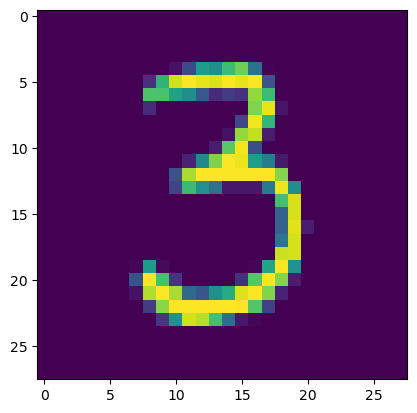

3


In [7]:
# Displaying the 10th image using matplotlib
plt.imshow(x_train[50])
plt.show()

#print the corresponding label
print(y_train[50])

#### Image Labels

In [8]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [9]:
# unique values  in y_train 
print(np.unique(y_train))

# unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


#### We can use these labels as such or we can also apply one Hot Encoding

##### All the images have the same dimensions in this  dataset, If not , we have to resize all the images to a common dimension

In [10]:
# scaling the values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0


In [11]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### Building The Neural Network

In [12]:
# setting up the neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Fatten layer in simple words it converts 2D array to 1D array
    keras.layers.Dense(50, activation='relu'), # Hidden layer with 50 neurons and ReLU activation function
    keras.layers.Dense(50, activation='relu'), # Hidden layer with 50 neurons and ReLU activation function
    keras.layers.Dense(10, activation='sigmoid') # Output layer with 10 neurons (for 10 classes) and softmax activation function 
])

c:\Users\pawar\anaconda3\envs\Ai_agents\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# compile the NN model
model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'],)

In [14]:
# training the nn model
model.fit(x_train, y_train, epochs=10) #epochs=10 means the model will train on the entire training dataset 10 times

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9135 - loss: 0.2983
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9581 - loss: 0.1420
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9683 - loss: 0.1054
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9748 - loss: 0.0842
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9794 - loss: 0.0688
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9822 - loss: 0.0578
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9847 - loss: 0.0497
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9869 - loss: 0.0421
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9874 - loss: 0.0375
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9890 - loss: 0.0323


### Training Data Accuracy is 99.0 %

In [15]:
loss, accuracy = model.evaluate(x_test, y_test) # evaluating the model on test dataset
print(f"Test Accuracy:{accuracy}")
print(f"Test Loss:{loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9699 - loss: 0.1178
Test Accuracy:0.9699000120162964
Test Loss:0.11780887097120285


### The Training Data Accuracy = 97.1 %

In [16]:
print(x_test.shape) # (10000, 28, 28) - 10000 test samples, each of size 28x28 pixels

(10000, 28, 28)


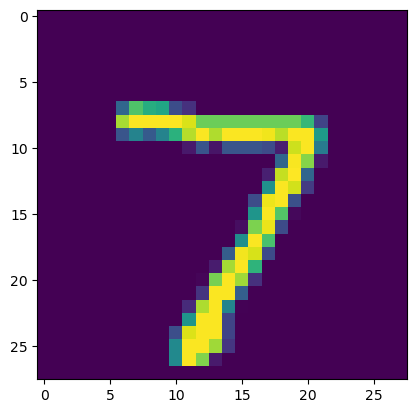

In [17]:
# fist data points in X_test
plt.imshow(x_test[0])
plt.show()

In [18]:
print(y_test[0]) # actual label for first image in test dataset

7


In [19]:
Y_pred = model.predict(x_test) # predicting the labels for test dataset

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [20]:
print(Y_pred.shape) # (10000, 10) - 10000 test samples, each with probabilities for 10 classes

(10000, 10)


In [21]:
print(Y_pred[0]) # prediction probabilities for first image in test dataset

[1.2511347e-03 2.2695754e-02 5.7390392e-01 9.9601370e-01 1.1152557e-06
 6.3513525e-02 3.1742427e-08 9.9999982e-01 4.9866341e-02 3.5508457e-01]


modle.predict() gives the prediction probabilty  of each class for that data point

In [22]:
# converting the prediction probabilites to clas labels for  all test data points
label_for_firts_image = np.argmax(Y_pred[0])
print(label_for_firts_image)

7


In [23]:
# converting the prediction probabilities to class labels for all test data points
Y_pred_labels = [np.argmax(probabilities) for probabilities in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(3), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

Y_test ---> True Labels

Y_pred_labels--> Predicted Labels

### Confusion Matrix


In [24]:
conf_mat = confusion_matrix( y_test, Y_pred_labels) # computing the confusion matrix

In [25]:
print(conf_mat)

tf.Tensor(
[[ 960    0    1    1    0    3   10    3    2    0]
 [   0 1107    5    2    0    0    2    5   13    1]
 [   2    3 1001    6    2    0    2    9    6    1]
 [   1    0    6  986    0    7    0    6    4    0]
 [   1    0    6    1  951    0    4    5    3   11]
 [   2    1    0   19    3  853    7    1    5    1]
 [   1    1    1    1    3    5  943    0    3    0]
 [   0    0   11   10    1    0    0 1000    2    4]
 [   4    0    7   12    2    5    4    4  933    3]
 [   5    0    0    8    8    4    0    8    9  967]], shape=(10, 10), dtype=int32)


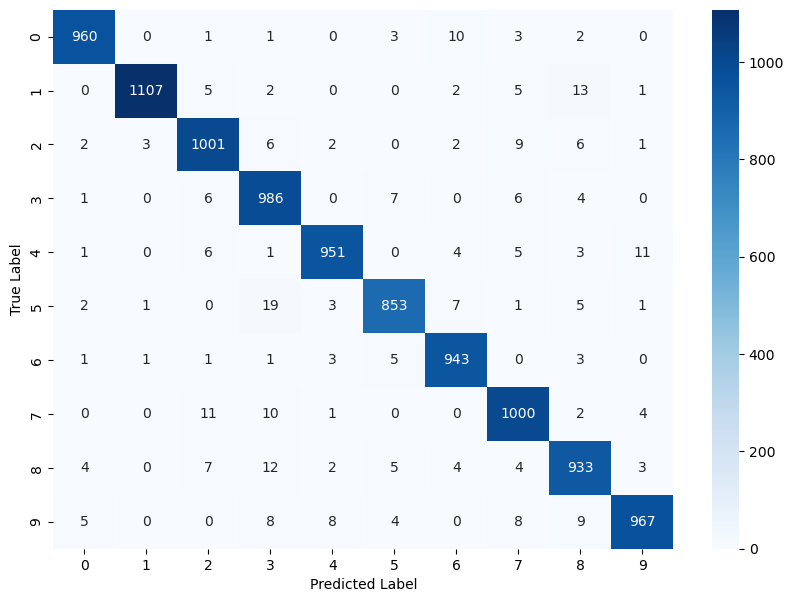

In [26]:
plt.figure(figsize=(10,7)) # setting the figure size
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues') # annot=True to display numbers in each cell, fmt='d' for integer format
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

#### Building the Predictive system

In [27]:
input_image_path = "test_image.png"
input_image  = cv2.imread(input_image_path) 

In [28]:
type(input_image)

numpy.ndarray

In [29]:
print(input_image)


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [30]:
input_image.shape

(28, 28, 3)

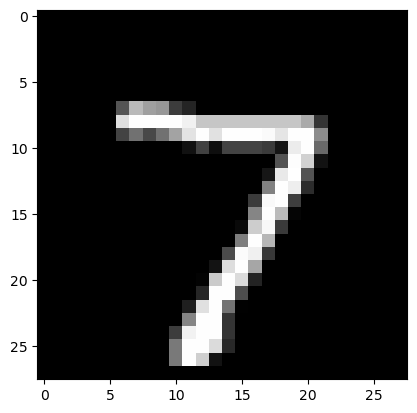

In [31]:
# print this image
input_image_gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY) # converting the image to grayscale
plt.imshow(input_image_gray, cmap='gray')

In [32]:
input_image_gray.shape

(28, 28)

In [33]:
input_image_resized = cv2.resize(input_image_gray, (28, 28)) # resizing the image to 28x28 pixels

In [34]:
# checking the shape of resized image
input_image_resized.shape


(28, 28)

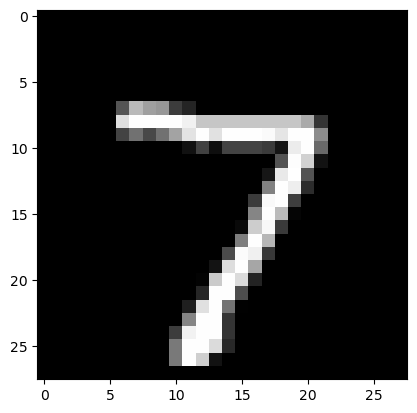

In [35]:
#print the resized image using cv2
plt.imshow(input_image_resized, cmap='gray')
plt.show()


In [36]:
input_image_resized = input_image_resized / 255.0  # normalizing the image

In [37]:
type(input_image_resized)

numpy.ndarray

In [38]:
image_reshaped = np.reshape(input_image_resized, (1, 28, 28)) # reshaping the image to match model input shape


In [39]:
input_prediction = model.predict(image_reshaped) # predicting the class probabilities for the input image
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
[[1.2603556e-03 2.2741798e-02 5.7518107e-01 9.9601835e-01 1.1139122e-06
  6.3039273e-02 3.1899443e-08 9.9999982e-01 5.0018474e-02 3.5530216e-01]]


In [40]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

7


#### Whole predictive system

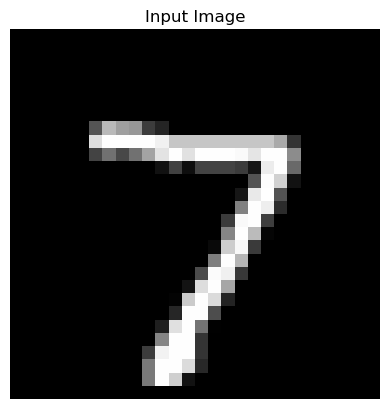

Final input shape to model: (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
The predicted digit is: 7


In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Take image path
input_image_path = input("Enter the path of the image: ")

# Read the image
input_image = cv2.imread(input_image_path)

# Check if loaded
if input_image is None:
    print("Error: Could not load image.")
    exit()

# Convert to grayscale
input_image_gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Show original grayscale image
plt.imshow(input_image_gray, cmap='gray')
plt.title("Input Image")
plt.axis("off")
plt.show()

# Resize to 28x28
input_image_resized = cv2.resize(input_image_gray, (28, 28))

# Normalize
input_image_resized = input_image_resized.astype("float32") / 255.0

# 🚀 IMPORTANT FIX: Add channel dimension
image_reshaped = np.reshape(input_image_resized, (1, 28, 28,))

print("Final input shape to model:", image_reshaped.shape)

# Predict
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)

print(f"The predicted digit is: {input_pred_label}")
